In [13]:
source('cqr_vanilla.r')
df=3
d = 1 
x_test <- seq(0,5,by=0.2)

alpha=0.1
n <- 500   #number of training samples
nrep <- 1 #number of independent trials
nrep2 <- 100
rho <- 0.5

evaluations <- expand.grid(1:nrep, nset, x_test,"CQR")
no_eval <- nrow(evaluations)
up_mat <- lo_mat <- width_mat <- cov_mat <- data.frame(number = rep(0, no_eval), 
                                                       rep = evaluations[,1], 
                                                       nset = evaluations[,2],
                                                       X_test = evaluations[,3],
                                                       method = evaluations[,4])
colnames(width_mat) <- colnames(cov_mat) <- c("number", "rep", "sample size", "test_value","method")


set.seed(1)
  
X=as.matrix(runif(n,0,5))	
eps1=rnorm(n)
eps2=rnorm(n)
Y=rpois(n,sin(X[,1])^2 +0.1 )+0.03*X[,1]*eps1+25*(runif(n,0,1)<0.01)*eps2

#X0=as.matrix(x_test)
X0 = runif(nrep2,0,5)
X0 = as.matrix(X0[order(X0)])
eps01=rnorm(nrep2)
eps02=rnorm(nrep2)
Y0=rpois(nrep2,sin(X0)^2 +0.1 )+0.03*X0*eps01+25*(runif(nrep2,0,1)<0.01)*eps02


beta_fixed = 0.05
mtry_fixed = 1
ntree_fixed = 100
    
tmp =   try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha))
while (class(tmp)=="try-error"){
  tmp =   try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha),silent=TRUE)
}
    
width_vec_cqr = tmp$pred_set(X0, Y0)[[2]]
cov_vec_cqr = tmp$pred_set(X0, Y0)[[1]]
y_lo_cqr <- tmp$pred_set(X0, Y0)[[3]]
y_up_cqr <- tmp$pred_set(X0, Y0)[[4]]
quant_lo_cqr <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_cqr <- tmp$pred_set(X0, Y0)[[6]]


source('cqr_function_conditional.r') 
method = "efficient"
split <- 1/2
beta_grid <- seq(0.01, 0.4, by=0.01)
mtry_grid <- 1
ntree_grid <- seq(50, 400, by = 50)

tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))    
while (class(tmp)=="try-error"){
tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
}
    
width_vec_efcp = tmp$pred_set(X0, Y0)[[2]]
cov_vec_efcp = tmp$pred_set(X0, Y0)[[1]]

y_lo_efcp <- tmp$pred_set(X0, Y0)[[3]]
y_up_efcp <- tmp$pred_set(X0, Y0)[[4]]

quant_lo_efcp <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_efcp <- tmp$pred_set(X0, Y0)[[6]]

method = "valid"
split <- c(1/2,1/2)

tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))    
while (class(tmp)=="try-error"){
tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
}
    
width_vec_vfcp = tmp$pred_set(X0, Y0)[[2]]
cov_vec_vfcp = tmp$pred_set(X0, Y0)[[1]]

y_lo_vfcp <- tmp$pred_set(X0, Y0)[[3]]
y_up_vfcp <- tmp$pred_set(X0, Y0)[[4]]

quant_lo_vfcp <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_vfcp <- tmp$pred_set(X0, Y0)[[6]]

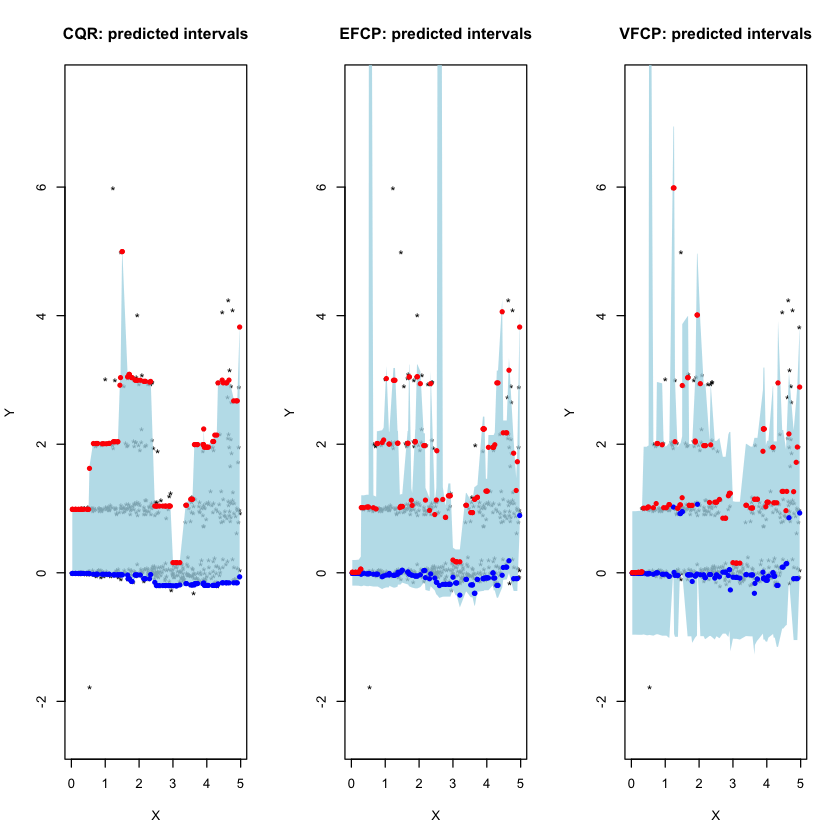

In [23]:
par(mfrow=c(1,3))
plot(X,Y,pch="*",col="black",main="CQR: predicted intervals",ylim=c(-2.5,7.5))
a = data.frame(x = X0, y = y_lo_cqr)
b = data.frame(x = c(1:100), y = y_up_cqr)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_cqr,col="blue",pch=20)
points(X0, quant_hi_cqr,col="red",pch=20)

plot(X,Y,pch="*",col="black",main="EFCP: predicted intervals",ylim=c(-2.5,7.5))
a = data.frame(x = X0, y = y_lo_efcp)
b = data.frame(x = c(1:100), y = y_up_efcp)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_efcp,col="blue",pch=20)
points(X0, quant_hi_efcp,col="red",pch=20)

plot(X,Y,pch="*",col="black",main="VFCP: predicted intervals",ylim=c(-2.5,7.5))
a = data.frame(x = X0, y = y_lo_vfcp)
b = data.frame(x = c(1:100), y = y_up_vfcp)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_vfcp,col="blue",pch=20)
points(X0, quant_hi_vfcp,col="red",pch=20)

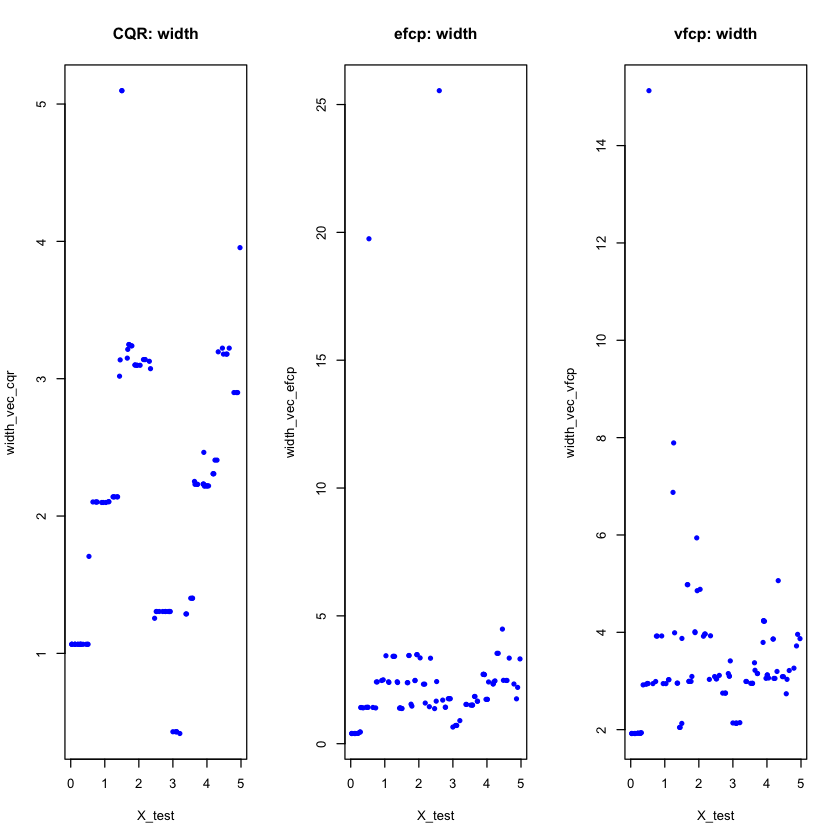

In [20]:
par(mfrow=c(1,3))
plot(X0, width_vec_cqr,col="blue",main = "CQR: width",xlab="X_test",pch=20)
plot(X0, width_vec_efcp,col="blue",main = "efcp: width",xlab="X_test",pch=20)
plot(X0, width_vec_vfcp,col="blue",main = "vfcp: width",xlab="X_test",pch=20)

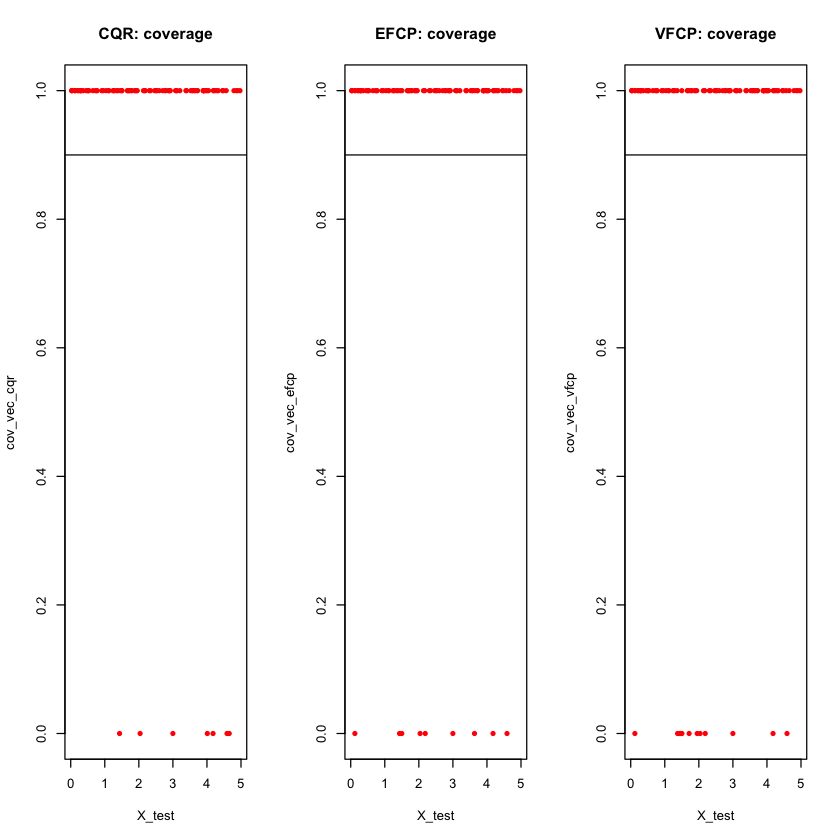

In [22]:
par(mfrow=c(1,3))
plot(X0, cov_vec_cqr,col="red",main = "CQR: coverage",xlab="X_test",pch=20)
abline(h=0.9)
plot(X0, cov_vec_efcp,col="red",main = "EFCP: coverage",xlab="X_test",pch=20)
abline(h=0.9)
plot(X0, cov_vec_vfcp,col="red",main = "VFCP: coverage",xlab="X_test",pch=20)
abline(h=0.9)

# Conditional coverage and width
Fix a grid of test points of x between 0 and 5. For each test point x, generate 100 y's using the underlying model and use the average coverage for the conditional coverage at x. Notice that the width of the prediction interval does not depend on y.

In [85]:
n <- 400
x_test = seq(0,5,by=0.2)
alpha <- 0.1 #miscoverage level
nrep  <-  10 #number of independent trials
nrep2 <- 100 #number of y's for each test point x

evaluations <- expand.grid(1:nrep, nset, x_test, c("efficient", "valid","CQR"))
no_eval <- nrow(evaluations)
ntree_mat <- beta_mat <- cqr_method_mat <- width_mat <- cov_mat <- data.frame(number = rep(0, no_eval),
                                   rep = evaluations[,1],
                                   nset = evaluations[,2],
                                   X_test = evaluations[,3],
                                   method = evaluations[,4])
colnames(width_mat) <- colnames(cov_mat) <- c("number", "rep", "sample size", "test_value","method")

for(idx in 1:nrow(evaluations)){
  set.seed(evaluations[idx, 1])
  if(idx%%10 == 0){
    print(idx)
  }

  x0 = evaluations[idx, 3]


  X <- as.matrix(runif(n,0,5))
  eps1 <- rnorm(n)
  eps2 <- rnorm(n)
  Y <- rpois(n,sin(X[,1])^2 +0.1 )+0.03*X[,1]*eps1+25*(runif(n,0,1)<0.01*eps2)

  X0 <- as.matrix(rep(x0,nrep2))
  eps01 <- rnorm(nrep2)
  eps02 <- rnorm(nrep2)
  Y0 <- rpois(nrep2,sin(X0)^2 +0.1 )+0.03*X0*eps01+25*(runif(nrep2,0,1)<0.01*eps02)

  width_mat[idx,3] <- cov_mat[idx, 3] <- n
  method <- evaluations[idx, 4]

  if (method =="CQR"){
    beta_fixed <- 0.05
    mtry_fixed <- 1
    ntree_fixed <- 100

    tmp <- try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha))

    while (class(tmp)=="try-error"){

      tmp <- try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha),silent=TRUE)

    }
    width_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[2]])
    cov_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[1]])
  }else{ if(method == "valid"){
    split <- c(1/2, 1/2)
  } else {
    split <- 1/2
  }

  beta_grid <- seq(1e-03, 4, length = 20)*alpha
  mtry_grid <- unique(ceiling(seq(1/10, 1, length = 20)*d))
  ntree_grid <- seq(50, 400, by = 50)

  tmp <- try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))

  while (class(tmp)=="try-error"){
    tmp <- try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
  }
        
  beta_mat[idx,1] = tmp$bet
  ntree_mat[idx,1] = tmp$ntree  
  cqr_method_mat[idx, 1]= tmp$cqr_method      
  width_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[2]])
  cov_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[1]])
  }
}


width_cqr <- sd_width_cqr  <-  width_efcp <- width_vfcp <- sd_width_efcp <- sd_width_vfcp <- NULL
for(x in x_test){
  TMP <- width_mat[evaluations[,4] == "efficient", ]
  TMP_prime <- TMP[TMP[,4] == x,]

  TMP <- width_mat[evaluations[,4] == "valid", ]
  TMP_prime_vfcp <- TMP[TMP[,4] == x,]

  TMP <- width_mat[evaluations[,4] == "CQR", ]
  TMP_prime_cqr <- TMP[TMP[,4] == x,]


  width_efcp <- c(width_efcp, mean(TMP_prime[,1] / TMP_prime_vfcp[,1]))
  sd_width_efcp <- c(sd_width_efcp, sd(TMP_prime[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

  width_vfcp <- c(width_vfcp, mean(TMP_prime_vfcp[,1] / TMP_prime_vfcp[,1]))
  sd_width_vfcp <- c(sd_width_vfcp, sd(TMP_prime_vfcp[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

  width_cqr <- c(width_cqr, mean(TMP_prime_cqr[,1] / TMP_prime_vfcp[,1]))
  sd_width_cqr <- c(sd_width_cqr, sd(TMP_prime_cqr[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

}

cov_cqr <-sd_cov_cqr <-cov_efcp <- cov_vfcp <-sd_cov_efcp <- sd_cov_vfcp <- NULL
for(x in x_test){
  TMP <- cov_mat[evaluations[,4] == "efficient", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_efcp <- c( cov_efcp, mean(TMP_prime[,1] ) )
  sd_cov_efcp <- c(sd_cov_efcp, sd(TMP_prime[,1])/sqrt(nrep))

  TMP <- cov_mat[evaluations[,4] == "valid", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_vfcp <- c(cov_vfcp, mean(TMP_prime[,1]))
  sd_cov_vfcp <- c(sd_cov_vfcp, sd(TMP_prime[,1])/sqrt(nrep))

  TMP <- cov_mat[evaluations[,4] == "CQR", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_cqr <- c(cov_cqr, mean(TMP_prime[,1]))
  sd_cov_cqr <- c(sd_cov_cqr, sd(TMP_prime[,1])/sqrt(nrep))
}

save(x_test, nset,nrep,width_mat, cov_mat, evaluations, width_efcp, sd_cov_efcp, sd_width_efcp,width_vfcp, sd_cov_vfcp,sd_width_vfcp, cov_efcp, cov_vfcp, alpha, file = "pois-runif(0,5)-n=400-100-repetitions.RData" )


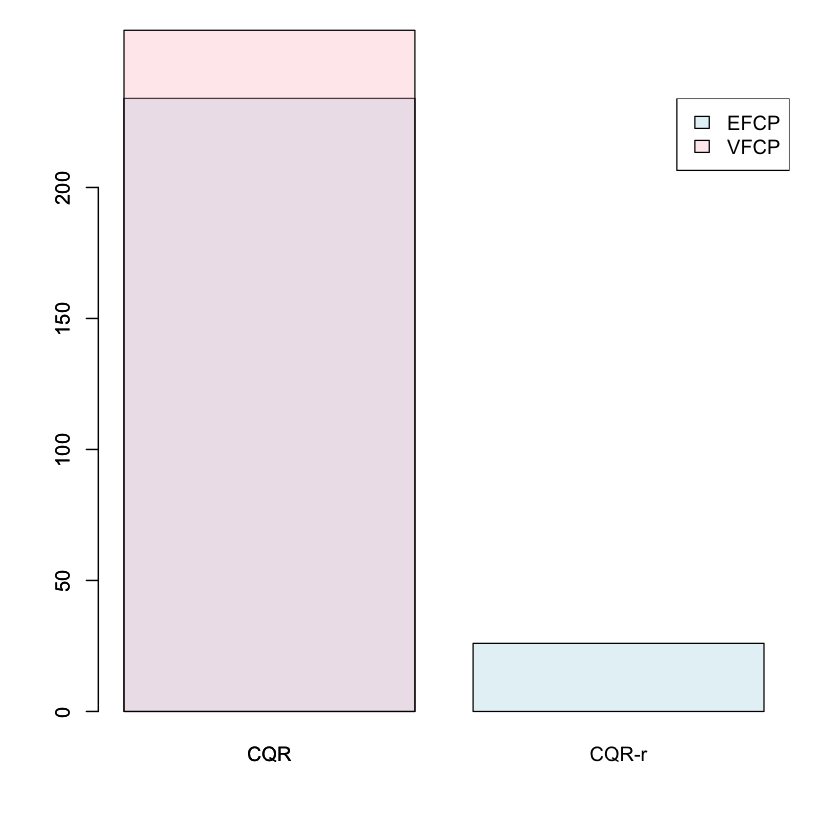

In [71]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

plot(factor(cqr_method_mat[evaluations[,4] == "valid",1]),col=c1)
plot(factor(cqr_method_mat[evaluations[,4] == "efficient",1]),col=c2,add=TRUE)

legend("topright", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

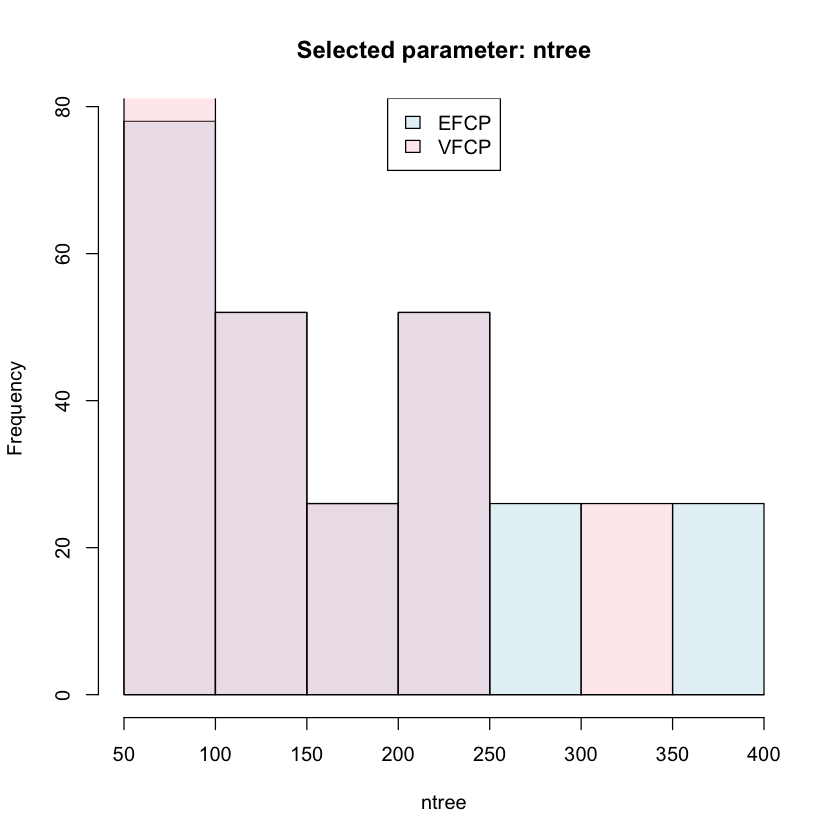

In [84]:
hist(ntree_mat[evaluations[,4] == "efficient",1],col=c1,breaks=ntree_grid,main="Selected parameter: ntree",xlab="ntree")
hist(ntree_mat[evaluations[,4] == "valid",1],col=c2,breaks=ntree_grid,add=TRUE)

legend("top", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

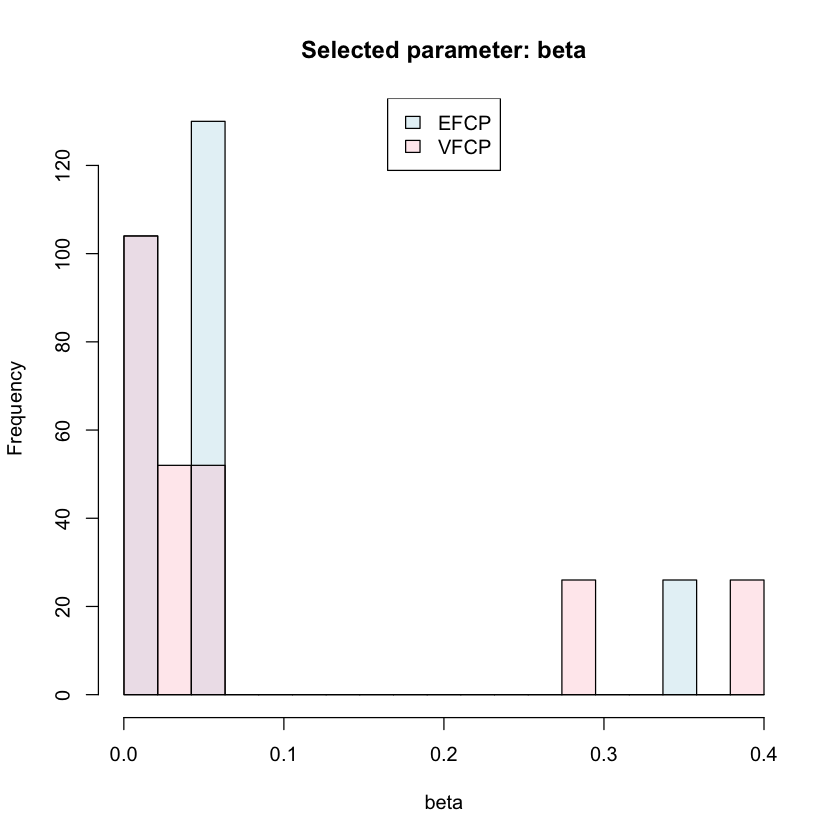

In [83]:
hist(beta_mat[evaluations[,4] == "efficient",1],col=c1,breaks=beta_grid,main="Selected parameter: beta",xlab="beta")
hist(beta_mat[evaluations[,4] == "valid",1],col=c2,breaks=beta_grid,add=TRUE)

legend("top", legend=c("EFCP", "VFCP"),
       fill=c(c1, c2))

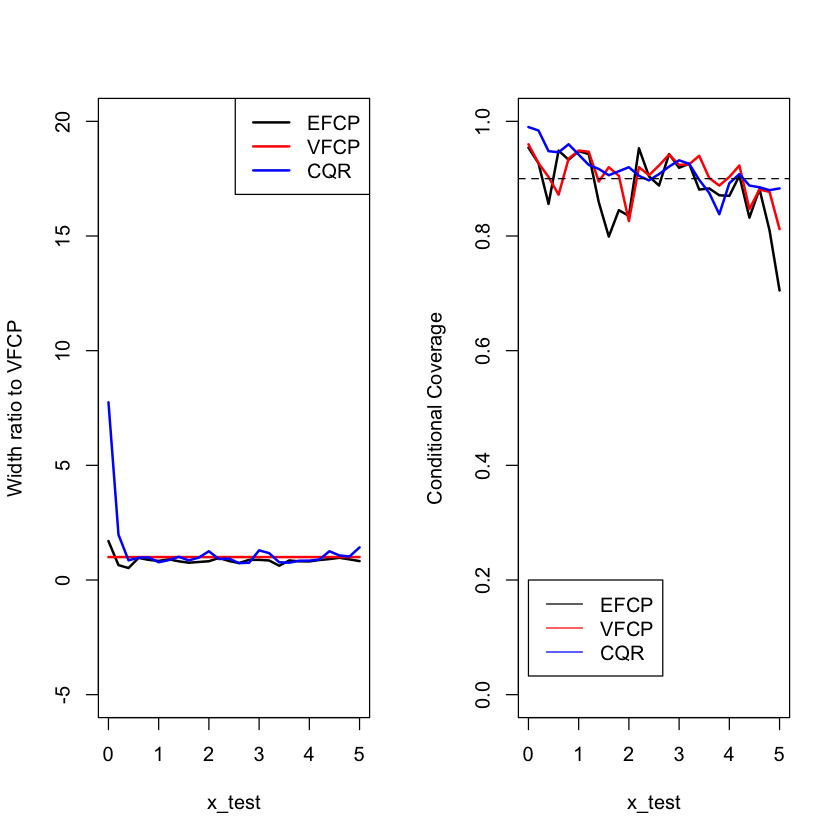

In [86]:
par(mfrow = c(1,2))
plot(x_test, width_efcp, type = 'l', ylim = c(-5,20), lwd = 2,ylab="Width ratio to VFCP")

#lines(x_test, width_efcp - sd_width_efcp, type = 'l', lty = 2, lwd = 2)
#lines(x_test, width_efcp + sd_width_efcp, type = 'l', lty = 2, lwd = 2)
lines(x_test, width_vfcp, type = 'l', ylim = range(c(width_efcp, width_vfcp)), lwd = 2, col = "red")
#lines(x_test, width_vfcp - sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
#lines(x_test, width_vfcp + sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
lines(x_test, width_cqr, type = 'l', ylim = range(c(width_efcp, width_vfcp)), lwd = 2, col = "blue")
legend("topright", legend=c("EFCP", "VFCP","CQR"),
       col=c("black","red", "blue"), lty=1, lwd=2)

plot(x_test, cov_efcp, type = 'l', ylim = c(0, 1), lwd = 2,ylab="Conditional Coverage")
lines(x_test, cov_vfcp, type = 'l', col = "red", lwd = 2)
lines(x_test, cov_cqr, type = 'l', col = "blue", lwd = 2)
legend(0,0.2, legend=c("EFCP", "VFCP","CQR"),
       col=c("black","red", "blue"), lty=1)
abline(h = 1-alpha,lty=2)